User wants to know if content rating affects the number of installs in the ENTERTAINMENT category Find the number of installs for each app based on the ENTERTAINMENT category and what their rating is.

Determine which kind of statistical test to perform. Present your statistical analysis with data visualizations of your choosing. Write a detailed report of your findings

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import statsmodels.stats.multicomp as multi

from statsmodels.formula.api import ols 

from statsmodels.stats.multicomp import MultiComparison



data = pd.read_csv("googleplaystoremaster.csv")

In [2]:
data.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [4]:
data = data[data.Installs != 'Free']

In [5]:
data['Installs'] = data['Installs'].str.replace('+', '')
data['Installs'] = data['Installs'].str.replace(',', '')
data.Installs=pd.to_numeric(data.Installs)

In [6]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [7]:
# removing variables from the dataframe that are not needed
df = data.drop(columns=['Reviews', 'Size', 'Type', 'Price', 'Rating', 'Genres', 'Last Updated',
                        'Current Ver', 'Android Ver'])

In [8]:
df=df.rename(columns={'Content Rating': 'Content_Rating'})

In [9]:
df['Installs'].isna().sum()

0

In [10]:
df_entertainment = df[df.Category == 'ENTERTAINMENT']

In [11]:
df_entertainment.head()

,App,Category,Installs,Content_Rating
855,Netflix,ENTERTAINMENT,100000000,Teen
856,Complete Spanish Movies,ENTERTAINMENT,1000000,Everyone
857,Pluto TV - It’s Free TV,ENTERTAINMENT,1000000,Teen
858,Tubi TV - Free Movies & TV,ENTERTAINMENT,10000000,Teen
859,YouTube Kids,ENTERTAINMENT,50000000,Everyone


In [12]:
df_entertainment.count()

App               149
Category          149
Installs          149
Content_Rating    149
dtype: int64

In [13]:
df_entertainment

,App,Category,Installs,Content_Rating
855,Netflix,ENTERTAINMENT,100000000,Teen
856,Complete Spanish Movies,ENTERTAINMENT,1000000,Everyone
857,Pluto TV - It’s Free TV,ENTERTAINMENT,1000000,Teen
858,Tubi TV - Free Movies & TV,ENTERTAINMENT,10000000,Teen
859,YouTube Kids,ENTERTAINMENT,50000000,Everyone
...,...,...,...,...
999,Meme Creator,ENTERTAINMENT,1000000,Mature 17+
1000,"Imgur: Find funny GIFs, memes & watch viral vi...",ENTERTAINMENT,10000000,Teen
1001,Meme Generator,ENTERTAINMENT,100000,Mature 17+
1002,SketchBook - draw and paint,ENTERTAINMENT,10000000,Everyone


<AxesSubplot:title={'center':'Installs'}, xlabel='Content_Rating'>

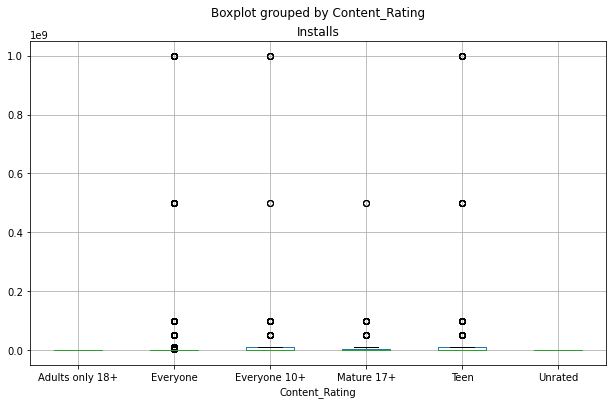

In [14]:
df.boxplot(column=['Installs'], by='Content_Rating', figsize=(10, 6))

One way ANOVA test Null hypothesis: content rating has no effect on the number of installs in the entertainment category. -mean of installs between all content ratings will be similar. Alternative hypothesis: content rating DOES affect the number of installs in the entertainment category. -mean of installs between all content ratings will will be significantly different. Alpha: 5%

In [15]:
stats.f_oneway(df['Installs'][df['Content_Rating']== 'Unrated'],
              df['Installs'][df['Content_Rating']== 'Adults only 18+'],
              df['Installs'][df['Content_Rating']== 'Mature 17+'],
              df['Installs'][df['Content_Rating']== 'Everyone 10+'],
              df['Installs'][df['Content_Rating']== 'Teen'],
              df['Installs'][df['Content_Rating']== 'Everyone'])

F_onewayResult(statistic=10.69923472119454, pvalue=2.820973704424052e-10)

Large F statistic and small P-value means null hypothesis should be rejected. This means we accept the alternative hypothesis stating that content rating does effect the number of installs in the entertainment category overall.

In [16]:
mc_installs = multi.MultiComparison(df['Installs'], df['Content_Rating'])
results = mc_installs.tukeyhsd()
print(results)

                  Multiple Comparison of Means - Tukey HSD, FWER=0.05                   
     group1        group2       meandiff    p-adj       lower          upper      reject
----------------------------------------------------------------------------------------
Adults only 18+     Everyone  12433707.4005    0.9  -127198646.291 152066061.0919  False
Adults only 18+ Everyone 10+  31299231.3889    0.9 -108814006.8541 171412469.6318  False
Adults only 18+   Mature 17+  10404457.9385    0.9 -129622901.5237 150431817.4008  False
Adults only 18+         Teen  28072033.9898    0.9  -111709537.252 167853605.2316  False
Adults only 18+      Unrated   -641416.6667    0.9 -221381558.7943  220098725.461  False
       Everyone Everyone 10+  18865523.9884  0.001    6702241.0799  31028806.8969   True
       Everyone   Mature 17+  -2029249.4619    0.9  -13159717.4734   9101218.5495  False
       Everyone         Teen  15638326.5893  0.001    8214474.5558  23062178.6228   True
       Everyone      

In [17]:
df_tukey = pd.DataFrame(data=results._results_table.data[1:], columns=results._results_table.data[0:])

In [18]:
type(df_tukey)

pandas.core.frame.DataFrame

C:\Users\jenyp\anaconda3\envs\Python 37\lib\site-packages\statsmodels\sandbox\stats\multicomp.py:775: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_yticklabels(np.insert(self.groupsunique.astype(str), 0, ''))


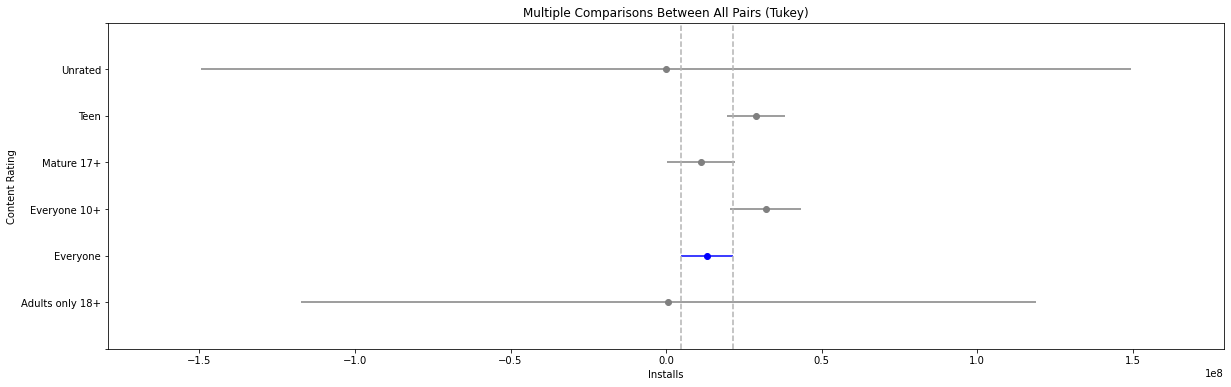

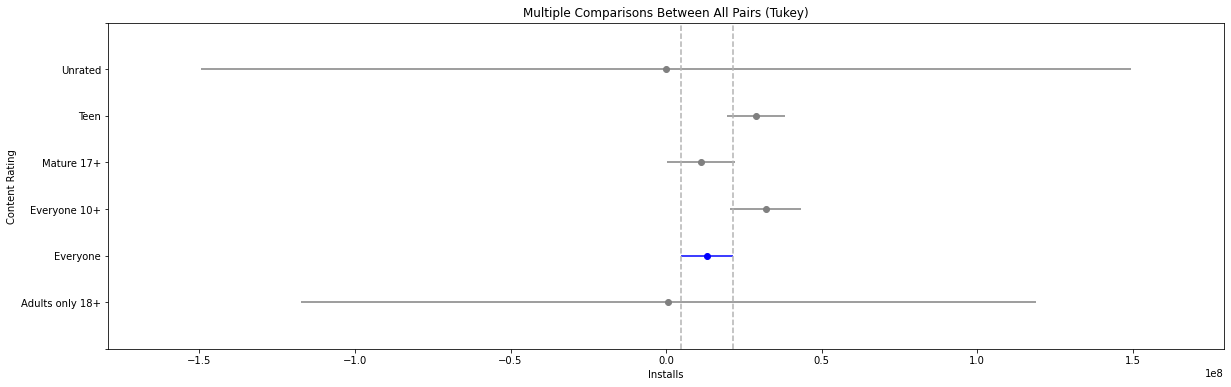

In [19]:
results.plot_simultaneous(comparison_name='Everyone', ax=None, figsize=(20, 6), 
                          xlabel='Installs', ylabel='Content Rating')

If confidence levels overlap, it is showing that we would accept the null hypothesis. It is a little tricky to tell with the visual because the install numbers have such a large range.